In [15]:
import sys
sys.path.append('../') # adding paths

In [18]:
from utils.calvin_styles import *

In [16]:
from utils.libs import *
import pandas as pd
import numpy as np

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [89]:
print('Train:', train.shape)
print('Test:', test.shape)

Train: (4209, 378)
Test: (4209, 377)


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [23]:
train.y.iplot(kind = 'hist')

In [87]:
train.y.sort_values().reset_index(drop = True).iplot(kind = 'scatter', mode = 'markers', size = 4)

In [101]:
var_type = pd.DataFrame(train.dtypes.value_counts(), columns = ['Count'])
var_type

,Count
int64,369
object,8
float64,1


In [37]:
col = train.columns.tolist()
d_type = [train[x].dtype for x in col]
var_type = pd.DataFrame({'col': col, 'd_type': d_type})
var_type.d_type.value_counts()

int64      369
object       8
float64      1
Name: d_type, dtype: int64

In [121]:
#train.columns.tolist()
ob_var = train.dtypes[train.dtypes == 'object']
ob_var

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

In [123]:
# The variables in 
for var in ob_var.index.tolist():
    print(train[var].unique())

['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
['a' 'e' 'c' 'f' 'd' 'b' 'g']
['d' 'b' 'c' 'a']
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae' 'ah'
 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Categorical variables

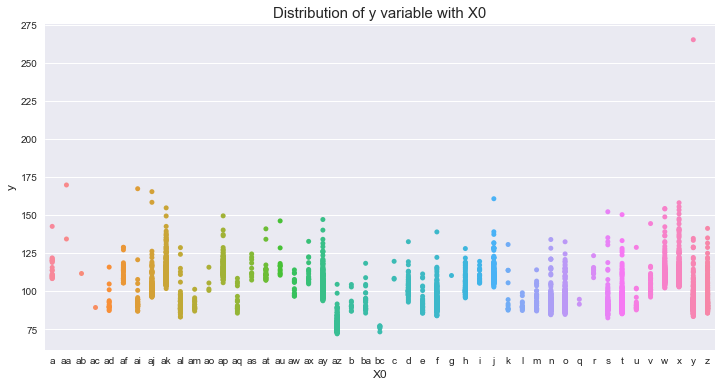

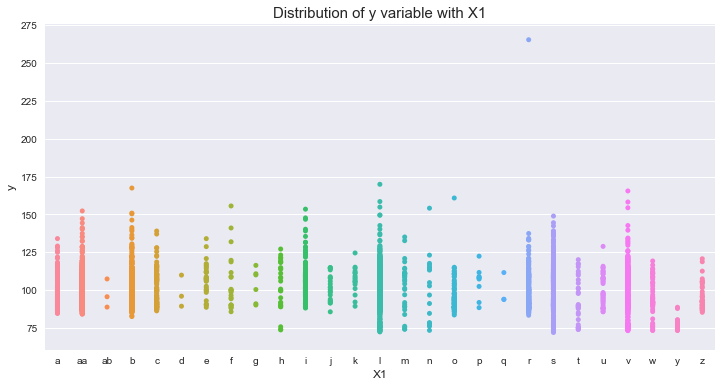

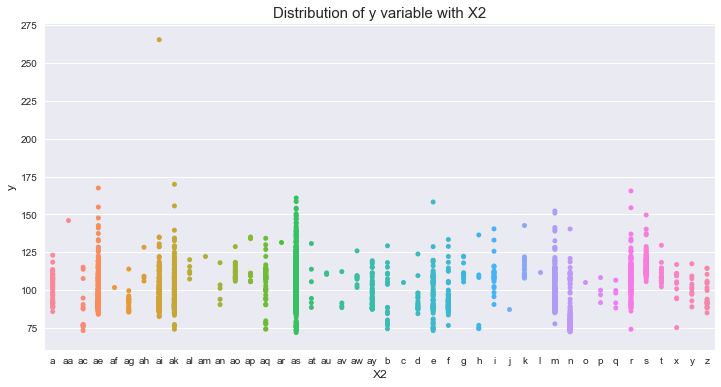

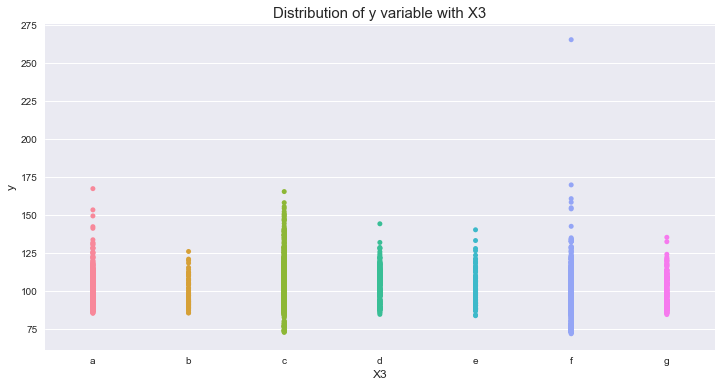

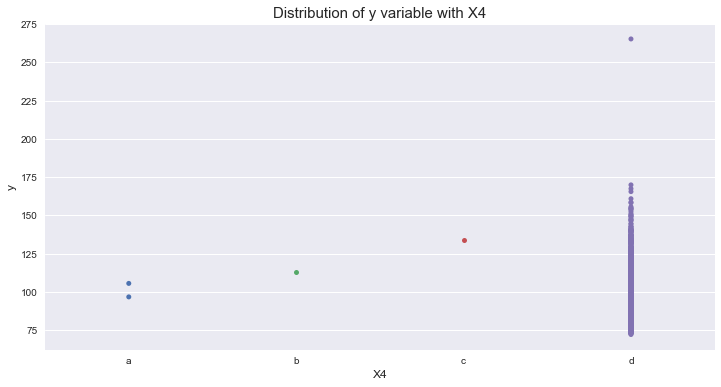

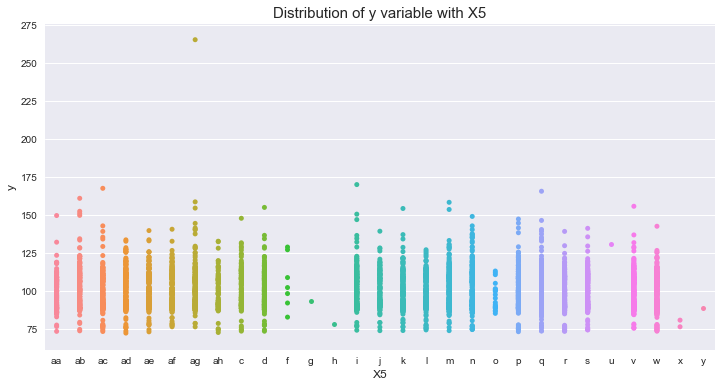

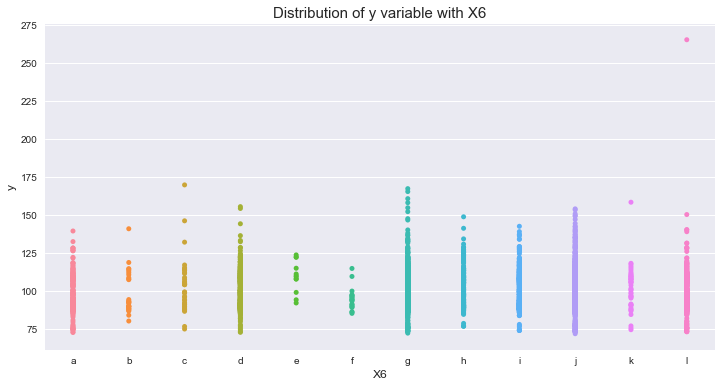

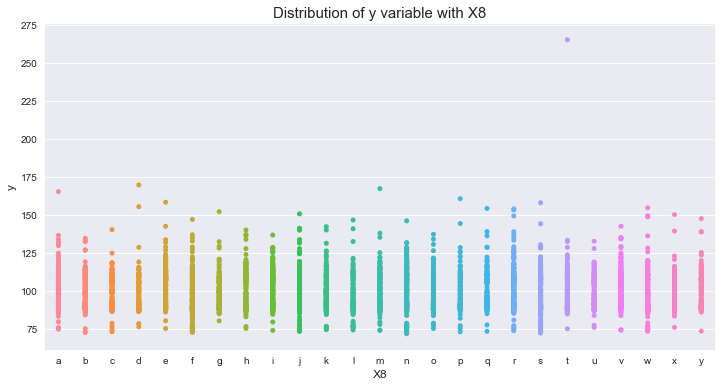

In [134]:
for i in ob_var.index.tolist():
    var_name = i
    col_order = np.sort(train[var_name].unique()).tolist()
    plt.figure(figsize=(12,6))
    sns.stripplot(x=var_name, y='y', data=train, order=col_order)
    plt.xlabel(var_name, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title("Distribution of y variable with "+var_name, fontsize=15)

In [74]:
for var in ob_var.col.tolist():
    temp = (train.groupby(var).std().mean()==0)  
    constant_cols = temp[temp==True].index.tolist()
    print('{1} constant columns across {0}\n'.format(var,len(constant_cols)))
    print(constant_cols)
    print('********************************')

31 constant columns across X0

['X11', 'X29', 'X54', 'X76', 'X93', 'X107', 'X118', 'X119', 'X136', 'X186', 'X187', 'X194', 'X231', 'X232', 'X233', 'X235', 'X236', 'X263', 'X268', 'X277', 'X279', 'X289', 'X290', 'X293', 'X297', 'X313', 'X314', 'X315', 'X316', 'X330', 'X347']
********************************
16 constant columns across X1

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X322', 'X323', 'X330', 'X331', 'X347', 'X361']
********************************
77 constant columns across X2

['X11', 'X15', 'X16', 'X21', 'X23', 'X26', 'X28', 'X30', 'X32', 'X36', 'X43', 'X44', 'X48', 'X53', 'X59', 'X62', 'X66', 'X67', 'X74', 'X80', 'X83', 'X86', 'X92', 'X93', 'X97', 'X98', 'X101', 'X102', 'X105', 'X107', 'X111', 'X112', 'X113', 'X125', 'X126', 'X128', 'X130', 'X134', 'X147', 'X172', 'X183', 'X184', 'X198', 'X199', 'X211', 'X213', 'X214', 'X215', 'X216', 'X222', 'X227', 'X233', 'X235', 'X237', 'X239', 'X250', 'X251', 'X255', 'X257', 'X260', 'X262', 'X264',

In [62]:
constant_cols

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']